In [1]:
import ciw 
import pandas as pd 
from pandas import DataFrame
import matplotlib as plt 
import numpy as np #Calcules numériques  
import matplotlib.pyplot as plt#Représentation Graphiques
%matplotlib inline
import math #Réalisation des opération mathématiques 
import matplotlib.pyplot as plt 
import seaborn as sns #Bibliothèque de la Data_Visualisation  
from collections import Counter

In [9]:
df=pd.read_csv(r'C:\Users\BOULHANNA\Desktop\INSEA S4\s4\SIMULATION\simulation_projet\output\DATA.csv')

In [10]:
df


,time,id_number,customer_class,node,arrival_date,waiting_time,service_start_date,service_time,service_end_date,time_blocked,exit_date,destination,queue_size_at_arrival,queue_size_at_departure
0,0,341,0,1,13.864202,15.766566,29.630768,0.082606,29.713374,0.0,29.713374,1,340,749
1,1,341,1,1,29.713374,31.661844,61.375218,0.023171,61.398389,0.0,61.398389,1,749,1504
2,2,341,1,1,61.398389,62.992398,124.390787,0.035148,124.425934,0.0,124.425934,1,1504,3058
3,3,341,0,1,124.425934,122.300761,246.726696,0.142225,246.868920,0.0,246.868920,1,3058,6048
4,4,3060,1,1,124.439122,122.429798,246.868920,0.062520,246.931440,0.0,246.931440,1,3059,6050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,11994,6045,0,1,246.708942,253.118210,499.827151,0.015678,499.842829,0.0,499.842829,1,6044,12285
11995,11995,3059,1,1,124.396233,122.224179,246.620412,0.106283,246.726696,0.0,246.726696,1,3058,6044
11996,11996,3059,1,1,246.726696,253.116133,499.842829,0.033187,499.876016,0.0,499.876016,1,6044,12288
11997,11997,6046,1,1,246.758080,253.117936,499.876016,0.118064,499.994081,0.0,499.994081,1,6045,12290


In [11]:
df.set_index('time')

,id_number,customer_class,node,arrival_date,waiting_time,service_start_date,service_time,service_end_date,time_blocked,exit_date,destination,queue_size_at_arrival,queue_size_at_departure
time,,,,,,,,,,,,,
0,341,0,1,13.864202,15.766566,29.630768,0.082606,29.713374,0.0,29.713374,1,340,749
1,341,1,1,29.713374,31.661844,61.375218,0.023171,61.398389,0.0,61.398389,1,749,1504
2,341,1,1,61.398389,62.992398,124.390787,0.035148,124.425934,0.0,124.425934,1,1504,3058
3,341,0,1,124.425934,122.300761,246.726696,0.142225,246.868920,0.0,246.868920,1,3058,6048
4,3060,1,1,124.439122,122.429798,246.868920,0.062520,246.931440,0.0,246.931440,1,3059,6050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,6045,0,1,246.708942,253.118210,499.827151,0.015678,499.842829,0.0,499.842829,1,6044,12285
11995,3059,1,1,124.396233,122.224179,246.620412,0.106283,246.726696,0.0,246.726696,1,3058,6044
11996,3059,1,1,246.726696,253.116133,499.842829,0.033187,499.876016,0.0,499.876016,1,6044,12288


In [12]:
client_A=df[df["customer_class"]==0]

In [13]:
client_A

,time,id_number,customer_class,node,arrival_date,waiting_time,service_start_date,service_time,service_end_date,time_blocked,exit_date,destination,queue_size_at_arrival,queue_size_at_departure
0,0,341,0,1,13.864202,15.766566,29.630768,0.082606,29.713374,0.0,29.713374,1,340,749
3,3,341,0,1,124.425934,122.300761,246.726696,0.142225,246.868920,0.0,246.868920,1,3058,6048
5,5,3061,0,1,124.441738,122.489702,246.931440,0.031088,246.962528,0.0,246.962528,1,3060,6050
7,7,3063,0,1,124.479272,122.551015,247.030287,0.278547,247.308834,0.0,247.308834,1,3062,6062
11,11,751,0,1,61.406459,63.019476,124.425934,0.134467,124.560401,0.0,124.560401,1,1504,3064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11987,11987,1505,0,1,124.390787,122.145543,246.536329,0.036513,246.572842,0.0,246.572842,1,3056,6040
11988,11988,1505,0,1,246.572842,253.052003,499.624845,0.100027,499.724872,0.0,499.724872,1,6040,12283
11990,11990,3058,0,1,124.395734,122.177108,246.572842,0.047570,246.620412,0.0,246.620412,1,3057,6041
11992,11992,6043,0,1,246.656917,253.113193,499.770111,0.031359,499.801470,0.0,499.801470,1,6042,12285


In [18]:
temp_de_sejour_A=(client_A["service_time"]+client_A["waiting_time"]).mean()

In [19]:
temp_de_sejour_A

125.74759762946427

In [20]:
client_B=df[df["customer_class"]==1]

In [21]:
client_B

,time,id_number,customer_class,node,arrival_date,waiting_time,service_start_date,service_time,service_end_date,time_blocked,exit_date,destination,queue_size_at_arrival,queue_size_at_departure
1,1,341,1,1,29.713374,31.661844,61.375218,0.023171,61.398389,0.0,61.398389,1,749,1504
2,2,341,1,1,61.398389,62.992398,124.390787,0.035148,124.425934,0.0,124.425934,1,1504,3058
4,4,3060,1,1,124.439122,122.429798,246.868920,0.062520,246.931440,0.0,246.931440,1,3059,6050
6,6,3062,1,1,124.474099,122.488430,246.962528,0.067759,247.030287,0.0,247.030287,1,3061,6053
8,8,3064,1,1,124.499461,122.809374,247.308834,0.015090,247.323924,0.0,247.323924,1,3063,6062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993,11993,6044,1,1,246.698625,253.102845,499.801470,0.025682,499.827151,0.0,499.827151,1,6043,12285
11995,11995,3059,1,1,124.396233,122.224179,246.620412,0.106283,246.726696,0.0,246.726696,1,3058,6044
11996,11996,3059,1,1,246.726696,253.116133,499.842829,0.033187,499.876016,0.0,499.876016,1,6044,12288
11997,11997,6046,1,1,246.758080,253.117936,499.876016,0.118064,499.994081,0.0,499.994081,1,6045,12290


In [22]:
temp_de_sejour_B=(client_B["service_time"]+client_B["waiting_time"]).mean()

In [23]:
temp_de_sejour_B


126.87547888628559

In [26]:
Exemple_4_unit_time=df[:5]

In [27]:
Exemple_4_unit_time

,time,id_number,customer_class,node,arrival_date,waiting_time,service_start_date,service_time,service_end_date,time_blocked,exit_date,destination,queue_size_at_arrival,queue_size_at_departure
0,0,341,0,1,13.864202,15.766566,29.630768,0.082606,29.713374,0.0,29.713374,1,340,749
1,1,341,1,1,29.713374,31.661844,61.375218,0.023171,61.398389,0.0,61.398389,1,749,1504
2,2,341,1,1,61.398389,62.992398,124.390787,0.035148,124.425934,0.0,124.425934,1,1504,3058
3,3,341,0,1,124.425934,122.300761,246.726696,0.142225,246.868920,0.0,246.868920,1,3058,6048
4,4,3060,1,1,124.439122,122.429798,246.868920,0.062520,246.931440,0.0,246.931440,1,3059,6050


In [28]:
Exemple_4_unit_time.set_index("time")

,id_number,customer_class,node,arrival_date,waiting_time,service_start_date,service_time,service_end_date,time_blocked,exit_date,destination,queue_size_at_arrival,queue_size_at_departure
time,,,,,,,,,,,,,
0,341,0,1,13.864202,15.766566,29.630768,0.082606,29.713374,0.0,29.713374,1,340,749
1,341,1,1,29.713374,31.661844,61.375218,0.023171,61.398389,0.0,61.398389,1,749,1504
2,341,1,1,61.398389,62.992398,124.390787,0.035148,124.425934,0.0,124.425934,1,1504,3058
3,341,0,1,124.425934,122.300761,246.726696,0.142225,246.868920,0.0,246.868920,1,3058,6048
4,3060,1,1,124.439122,122.429798,246.868920,0.062520,246.931440,0.0,246.931440,1,3059,6050


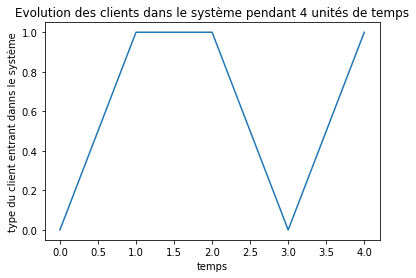

In [46]:
# x axis values
x =Exemple_4_unit_time["time"] 
# corresponding y axis values
y = Exemple_4_unit_time["customer_class"]
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('temps')
# naming the y axis
plt.ylabel('type du client entrant danns le système')
  
# giving a title to my graph
plt.title('Evolution des clients dans le système pendant 4 unités de temps')
  
# function to show the plot
plt.show()

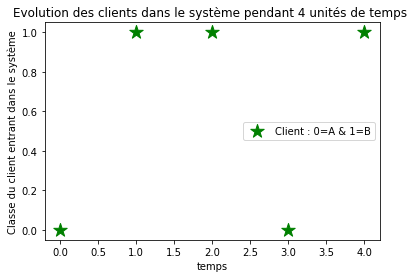

In [45]:

import matplotlib.pyplot as plt
  

    
# x axis values
x =Exemple_4_unit_time["time"] 
# corresponding y axis values
y = Exemple_4_unit_time["customer_class"]
  
# plotting points as a scatter plot
plt.scatter(x, y, label= "Client : 0=A & 1=B", color= "green", 
            marker= "*", s=200)
  
# x-axis label
plt.xlabel('temps')
# frequency label
plt.ylabel('Classe du client entrant dans le système')
# plot title
plt.title('Evolution des clients dans le système pendant 4 unités de temps ')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()